<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.7 MB/s eta 0:00:00


Delivery Time: 20.99739749075758
Incentive: 48.87897157622446
Rating: 3.0000000000000004


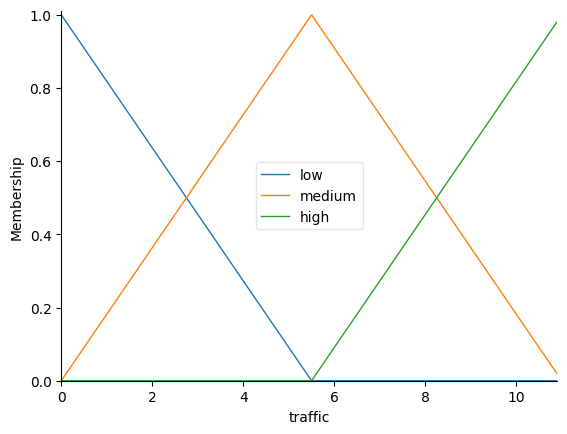

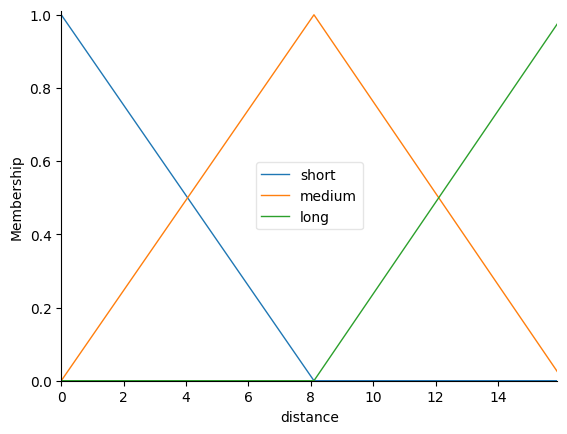

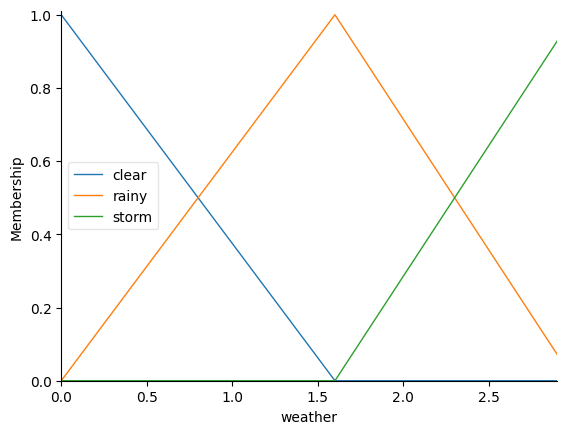

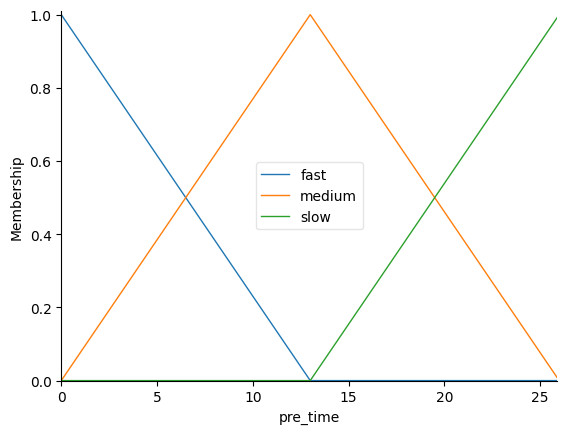

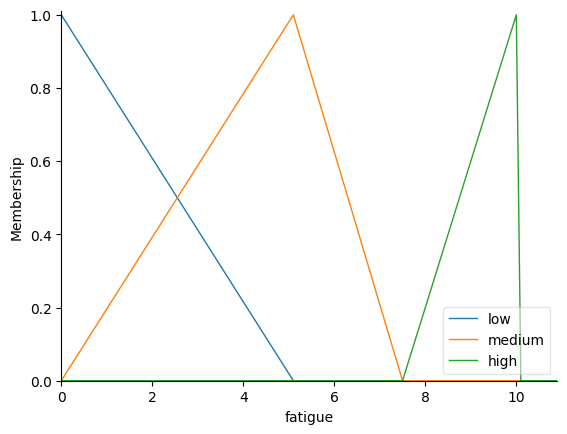

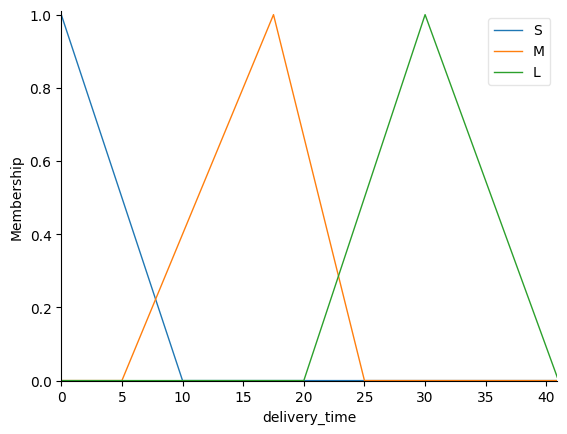

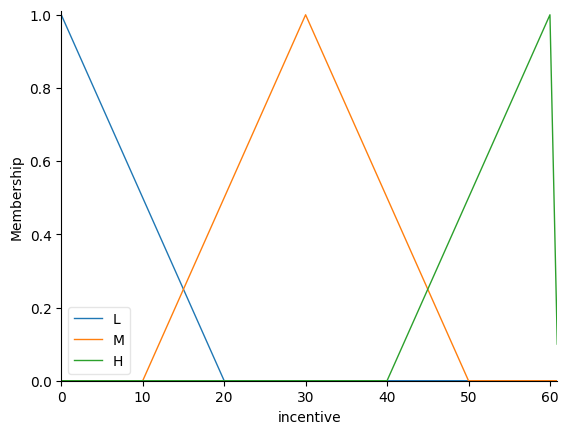

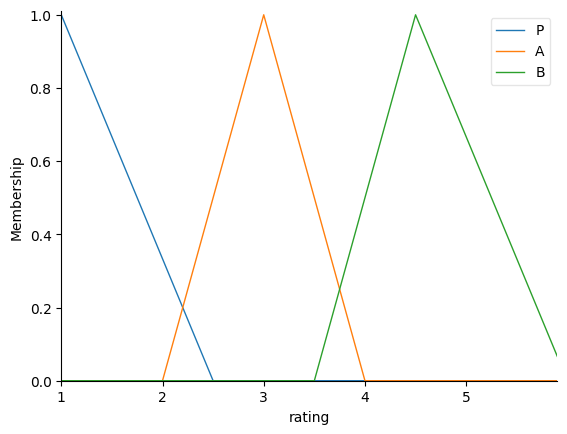

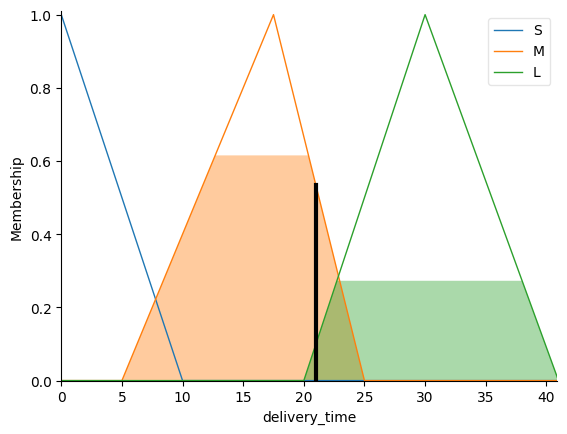

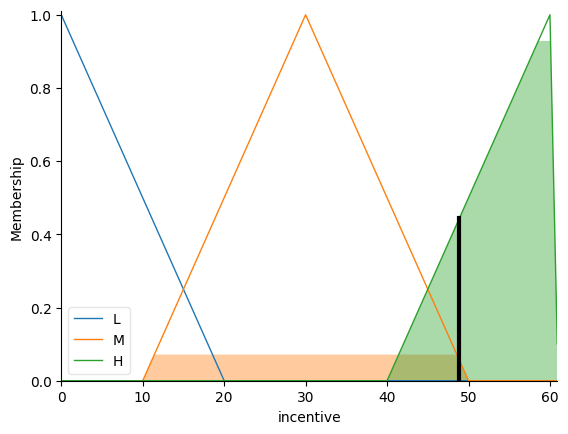

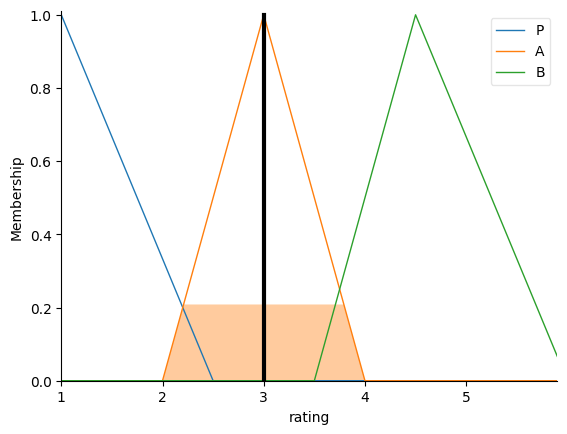

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

traffic= ctrl.Antecedent(np.arange(0,11,0.1),'traffic')
distance= ctrl.Antecedent(np.arange(0,16,0.1),'distance')
weather= ctrl.Antecedent(np.arange(0,3,0.1),'weather')
pre_time= ctrl.Antecedent(np.arange(0,26,0.1),'pre_time')
fatigue= ctrl.Antecedent(np.arange(0,11,0.1),'fatigue')

delivery_time= ctrl.Consequent(np.arange(0,41,0.1),'delivery_time')
incentive= ctrl.Consequent(np.arange(0,61,0.1),'incentive')
rating= ctrl.Consequent(np.arange(1,6,0.1),'rating')

traffic['low']=fuzz.trimf(traffic.universe,[0,0,5.5])
traffic['medium']=fuzz.trimf(traffic.universe,[0,5.5,11])
traffic['high']=fuzz.trimf(traffic.universe,[5.5,11,11])

distance['short']=fuzz.trimf(distance.universe,[0,0,8.1])
distance['medium']=fuzz.trimf(distance.universe,[0,8.1,16.1])
distance['long']=fuzz.trimf(distance.universe,[8.1,16.1,16.1])

weather['clear']=fuzz.trimf(weather.universe,[0,0,1.6])
weather['rainy']=fuzz.trimf(weather.universe,[0,1.6,3])
weather['storm']=fuzz.trimf(weather.universe,[1.6,3,3])

pre_time['fast']=fuzz.trimf(pre_time.universe,[0,0,13])
pre_time['medium']=fuzz.trimf(pre_time.universe,[0,13,26])
pre_time['slow']=fuzz.trimf(pre_time.universe,[13,26,26])

fatigue['low']=fuzz.trimf(fatigue.universe,[0,0,5.1])
fatigue['medium']=fuzz.trimf(fatigue.universe,[0,5.1,7.5])
fatigue['high']=fuzz.trimf(fatigue.universe,[7.5,10,10])

delivery_time['S']=fuzz.trimf(delivery_time.universe,[0,0,10])
delivery_time['M']=fuzz.trimf(delivery_time.universe,[5,17.5,25])
delivery_time['L']=fuzz.trimf(delivery_time.universe,[20,30,41])

incentive['L']=fuzz.trimf(incentive.universe,[0,0,20])
incentive['M']=fuzz.trimf(incentive.universe,[10,30,50])
incentive['H']=fuzz.trimf(incentive.universe,[40,60,61])

rating['P']=fuzz.trimf(rating.universe,[1,1,2.5])
rating['A']=fuzz.trimf(rating.universe,[2,3,4])
rating['B']=fuzz.trimf(rating.universe,[3.5,4.5,6])

traffic.view()
distance.view()
weather.view()
pre_time.view()
fatigue.view()
delivery_time.view()
incentive.view()
rating.view()

rule1=ctrl.Rule(traffic['low']&distance['short'],delivery_time['S'])
rule2=ctrl.Rule(traffic['medium']&distance['short'],delivery_time['M'])
rule3=ctrl.Rule(traffic['high']&distance['short'],delivery_time['L'])
rule4=ctrl.Rule(weather['clear'],incentive['L'])
rule5=ctrl.Rule(weather['rainy'],incentive['M'])
rule6=ctrl.Rule(weather['storm'],incentive['H'])
rule7=ctrl.Rule(pre_time['fast']&traffic['low'],delivery_time['S'])
rule8=ctrl.Rule(pre_time['medium']&traffic['medium'],delivery_time['M'])
rule9=ctrl.Rule(pre_time['slow']&traffic['high'],delivery_time['L'])
rule10=ctrl.Rule(fatigue['low'],rating['P'])
rule11=ctrl.Rule(fatigue['medium'],rating['A'])
rule12=ctrl.Rule(fatigue['high'],rating['B'])
rule13=ctrl.Rule(distance['long']&weather['storm']&traffic['high'],(delivery_time['L'],incentive['H']))
rule14=ctrl.Rule(distance['short']&weather['clear']&traffic['low'],(delivery_time['S'],incentive['L']))
rule15=ctrl.Rule(fatigue['high']&traffic['high'],(rating['P'],delivery_time['L']))

control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
fuzzy_system=ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['traffic']=7
fuzzy_system.input['distance']=5
fuzzy_system.input['weather']=7
fuzzy_system.input['pre_time']=18
fuzzy_system.input['fatigue']=7
fuzzy_system.compute()
print(f"Delivery Time: {fuzzy_system.output['delivery_time']}")
print(f"Incentive: {fuzzy_system.output['incentive']}")
print(f"Rating: {fuzzy_system.output['rating']}")
delivery_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)


